## Importing Packages

In [1]:
#Import Needed Packages

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
from datetime import datetime
import plotly.offline as py
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from matplotlib import ticker
from datetime import datetime, timedelta
%matplotlib inline

##  Loading Data

In [2]:
# Read The Data 
df = pd.read_csv(r"C:\Users\Msys\Desktop\Data Science-GSG\train.tsv",sep='\t')

#### Overview

In [3]:
df.head() # View The First 5 Rows 

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
df.shape #The number of Rows and Columns of The DataFrame

(1482535, 8)

In [5]:
df.info() #Summary of The Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


- 3 integer type variables(train_id, item_condition_id, and shipping)
- 1 float type variable(price)
- 4 text type variables(name, category_name, brand_name, and item_description). 

# EDA

###  train_id 

In [6]:
df['train_id'].nunique()

1482535

The number of unique values in the **train_id** column is just the number of instances in the data set. The value of this column is a duplicate of the dataframe index, so we don't need it .
- We'll drop it.

In [7]:
df = df.drop("train_id",axis = 1) #drop train_id column

In [8]:
df.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


### name 

In [9]:
df['name'].nunique()

1225273

Obviously the name is a categorical feature as it contains the name of each item. However, the total numbers of unique names is  less than the number of records in the dataset, which means huge number of duplicates exist in the name column. 


### item_condition_id

In [10]:
df['item_condition_id'].nunique() # number of unique values in item_condition_id column

5

In [11]:
df['item_condition_id'].unique()  # unique values in item_condition_id column

array([3, 1, 2, 4, 5], dtype=int64)

This is an ordinal variable. There are only five unique values, indicating the usage condition of the items. And the number itself may infer how much the item worth.

### category_name

In [12]:
df['category_name'].nunique() # number of unique values in category_name column

1287

In [13]:
df['category_name'].unique() # unique values in category_name column

array(['Men/Tops/T-shirts',
       'Electronics/Computers & Tablets/Components & Parts',
       'Women/Tops & Blouses/Blouse', ..., 'Handmade/Jewelry/Clothing',
       'Vintage & Collectibles/Supplies/Ephemera',
       'Handmade/Pets/Blanket'], dtype=object)

This is a categorical feature. 
Only 1287 categories are listed in the column of category_name. This is not surprising since many items can be from the same category. 

### brand_name

In [14]:
df['brand_name'].nunique() # number of unique values in brand_name column

4809

In [15]:
df['brand_name'].unique()# unique values in brand_name column

array([nan, 'Razer', 'Target', ..., 'Astroglide', 'Cumberland Bay',
       'Kids Only'], dtype=object)

This is also a categorical feature.We have 4809 brands are listed in the column brand_name.

### price

In [16]:
df['price'].nunique() # number of unique values in price column

828

In [17]:
#df['price'].unique() # unique values in price column

Price is a numerical feature. However, there are only 828 unique values in price. It infers that there maybe some dense area in the distribution of the price.

### shipping

In [18]:
df['shipping'].nunique() # number of unique values in shipping column

2

In [19]:
df['shipping'].unique() # unique values in shipping column

array([1, 0], dtype=int64)

This is obviously a categorical feature with only two categories(0 or 1).

### item_description

In [20]:
df['item_description'].nunique() # number of unique values in item_description column

1281426

1281426 values in item_description colunm,so we have many more unique values appear in this feature. Since descriptions are considered less likely to be duplicates, we believe there maybe some missing values. Despite more investigation is needed, it can be confirmed that this is a categorical feature.

## Statistical Investigation

### Price

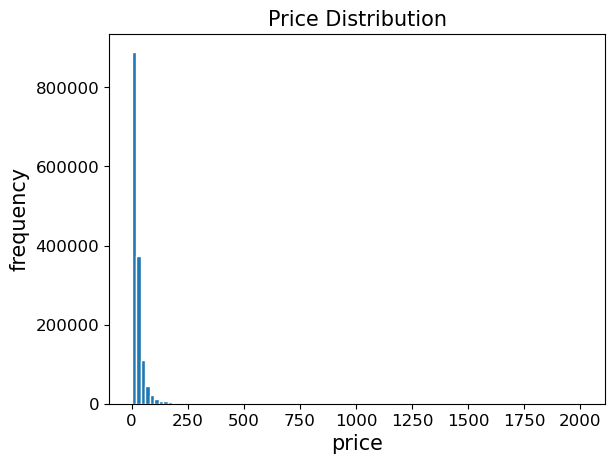

In [21]:
(df['price']).plot.hist(bins=100, edgecolor='white')
plt.xlabel('price', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.tick_params(labelsize=12)
plt.title('Price Distribution', fontsize=15)
plt.show()

In [22]:
print('statistics:\n')
print(df['price'].describe())

statistics:

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64


It seems the price is heavily **right skewed**. Most items are tagged with price lower than 100 Dollars.However ,the range of the plot indicates that there are items with extreme high prices as much as more than 2000. But the right skewed shape is telling that the number of items with highe price is very limited.And from the statistics we know that the **max price is 2009 Dollars**, and the mean_price 26.7 Dollars.Also,it shows that the **minimun price is 0 Dollars**, which is weird.

In [23]:
print('The number of items with price higher than $500: {}'.format(np.where(df['price']>500,True,False).sum()))

The number of items with price higher than $500: 1115


As we discussed, the proportion of high price items is very small. There are only 1115 items whose prices are higher than 500 Dollars.

In [24]:
np.where(df['price']>2000,True,False).sum()

3

There are only 3 items whose prices are higher than 2000 Dollars.

In [25]:
df[np.where(df['price']>2000,True,False)]

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
760469,NEW Chanel WOC Caviar Gold Hardware,1,Women/Women's Handbags/Shoulder Bag,Chanel,2009.0,0,"New with tag, box and dustbag but no receipt. ..."
1262245,NEW-Chanel Boy Wallet o Chain WOC Caviar,1,Women/Women's Handbags/Messenger & Crossbody,Chanel,2006.0,0,Brand: Chanel Style: WOC Boy Wallet on Chain T...
1393600,David Yurman Wheaton ring,2,Women/Jewelry/Rings,David Yurman,2004.0,0,David Yurman Wheaton wing. Size 6. Original re...


To make sure these high price items are not outliers, we zoomed into the data and filtered out the items with prices higher than 2000 Dollars. We found that these items come from luxury brands such as Chanel and David Yurman. They deserve the high price for sure. So, now we can tell these records are indeed not outliers.

Also, we noticed from the statistics that the minimum value in price column is 0. We are going to check these records.

In [26]:
print('The number of items with price of $0: {}'.format(np.where(df['price']==0,True,False).sum()))

The number of items with price of $0: 874


In [27]:
df[np.where(df['price']==0,True,False)]

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1325,Alabama Crimson Tide Quality Lanyard,1,Sports & Outdoors/Fan Shop/NCAA,NaN,0.0,1,TOP QUALITY THICK LANYARD Reversible sides wit...
2544,Levi leggings,3,"Women/Jeans/Slim, Skinny",Levi's®,0.0,0,Light wash. Hardly worn. Size 24 but fits like...
2712,Simple Red Lace Lingerie Top,3,Women/Underwear/G-Strings & Thongs,NaN,0.0,0,"Very simple but cute, a little form fitting as..."
3576,Turquoise 15 Pc Makeup Brush Set,1,Beauty/Tools & Accessories/Makeup Brushes & Tools,NaN,0.0,1,1 left!
3761,Girls size 7/8,3,Kids/Girls (4+)/Tops & T-Shirts,NaN,0.0,1,5 pair gap jean excellent used condition 3 chi...
...,...,...,...,...,...,...,...
1474172,Homecoming or Dama ivory dress,2,"Women/Dresses/Above Knee, Mini",NaN,0.0,0,Ivory formal dress. I wore this dress once for...
1474198,Tie up flannel top,3,Women/Tops & Blouses/Blouse,NaN,0.0,1,I got this last year and just didnt wear it mu...
1477958,Rae Dunn Measuring Pear,3,Home/Home Décor/Home Décor Accents,NaN,0.0,0,The dash lid appears it was dropped and a piec...
1478519,4 pairs women's wool boots socks,1,Women/Shoes/Boots,NaN,0.0,1,✔️SHARE YOUR SOCKS WITH FRIENDS AND FAMILY! ✔️...


That is weird as these items seem normal items. It makes no sense that the vendors sell them for free, not to say some of them even provide shipping fees. They could be missing values if their true price were lost for some reason. They could also be outliers if the vendors indeed were selling them for free, cause these records would be noises when building the model. As there is nothing common about these items, we would regard them more as outliers that should be eliminated during modeling.

### name 
As we discovered, the number of unique values in name column is far smaller than the number of records. So, we are going to identify what names are most frewuently used in our data set.

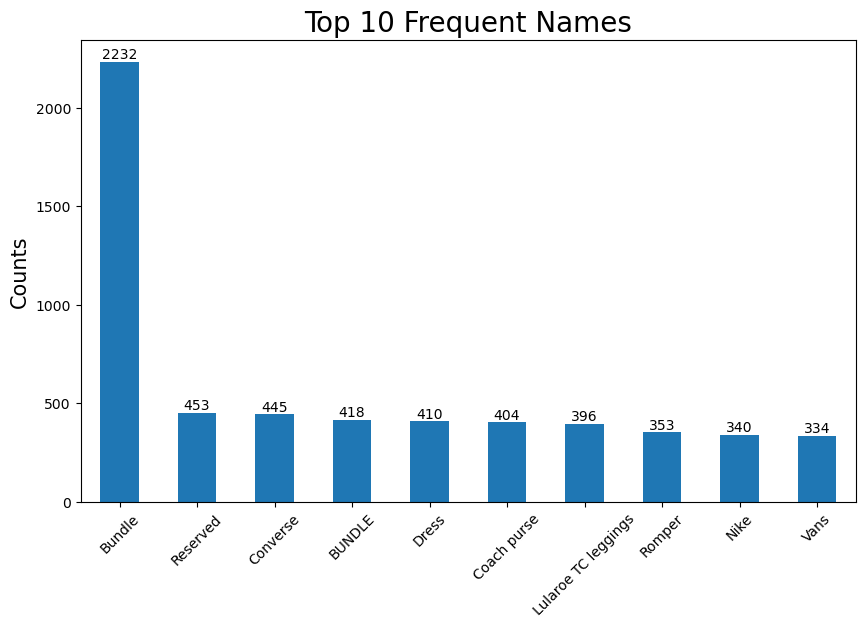

In [28]:
plt.figure(figsize = (10,6))
ax = df['name'].value_counts()[:10].plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.ylabel('Counts',fontsize = 15)
plt.title('Top 10 Frequent Names',fontsize = 20)
for i in ax.patches:
    y_value = i.get_height()
    x_value = i.get_x()+i.get_width()/2
    plt.annotate(int(y_value),(x_value,y_value),ha = 'center',va = 'bottom')
plt.show()

Here, we found that the most frequently used names are vague names like 'Bundle', or brand names like 'Converse', 'Nike', or combinations of category and brand like 'Coach purse'. Now we can tell the reason for huge amount of duplicate values in name column is these vague names. Maybe the vendors are too lazy to make them more clear. We are curious about what exactly are 'Bundle' items.

In [29]:
df[df['name']=='Bundle']

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
122,Bundle,3,NaN,NaN,59.0,0,Sizes and info of clothes can be found on thei...
290,Bundle,1,Other/Other/Other,NaN,81.0,0,[rm] Discounted price [rm]
932,Bundle,1,Women/Sweaters/Poncho,NaN,26.0,0,1pc Oversize Turtle Neck Plaid Poncho Cape 1pc...
1053,Bundle,3,Electronics/Video Games & Consoles/Games,Nintendo,22.0,1,Minor play scratches Played with condition Tha...
2158,Bundle,2,"Women/Skirts/Straight, Pencil",NaN,36.0,1,Please check to see if its all
...,...,...,...,...,...,...,...
1478182,Bundle,1,Women/Underwear/Other,PINK,35.0,0,Brand new! Victoria's Secret pink push-up bral...
1479850,Bundle,3,Women/Athletic Apparel/Jackets,Columbia,30.0,0,Cute woman's Columbia wind breaker size medium...
1480139,Bundle,3,"Women/Dresses/Above Knee, Mini",NaN,26.0,0,Dress Dress Slip Dress Lingerie pleather-free ...
1480496,Bundle,3,Other/Other/Other,NaN,20.0,0,See pictures :) thank you! Will ship Monday


In [30]:
print("Mean price of 'Bundle' items: ${:.2f}".format(df[df['name']=='Bundle']['price'].mean()))
print("Mean price of all items: ${:.2f}".format(df['price'].mean()))

Mean price of 'Bundle' items: $34.50
Mean price of all items: $26.74


we found that the average price for 'Bundle' items are much higher than that for all items. Perhaps more sub-items are included in the bundles. And that makes the price higher than that of normal items.

### item_condition_id
No missing values appear in the item_condition_id column. And there are only 5 unique values in this column, from 1 to 5.
- First,we are going to check how many items are there in each condition group.

In [31]:
condition_count = df['item_condition_id'].value_counts()
print('Number of items in each condition category:')
print(condition_count)

Number of items in each condition category:
1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


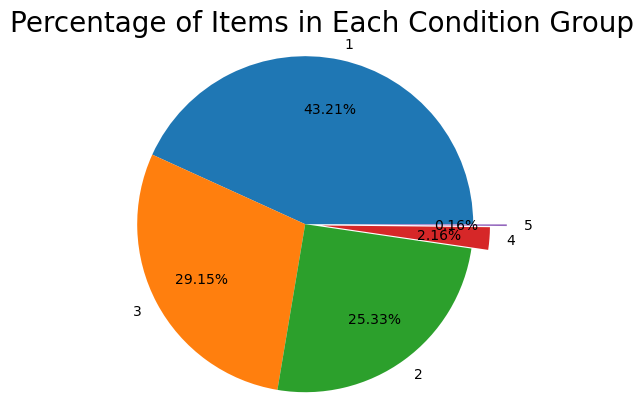

In [32]:
condition_percentage = df['item_condition_id'].value_counts()/df.shape[0]
ax2 = condition_percentage.plot(kind = 'pie',autopct='%1.2f%%',pctdistance = 0.7,explode = [0,0,0,0.1,0.2])
ax2.axis('equal')
plt.title('Percentage of Items in Each Condition Group',fontsize = 20)
plt.ylabel('')
plt.show()

- The biggest group is 1 with 43.2% of items. It is not hard to assume that sellers are more likely to sell items with better conditions. And group 5 is the smallest one with only 0.16% of items. 
- But how does the condition information related with the price. We would use a boxplot to demonstrate this relationship.

Text(0.5, 1.0, 'Relationship between Item Condition and Price')

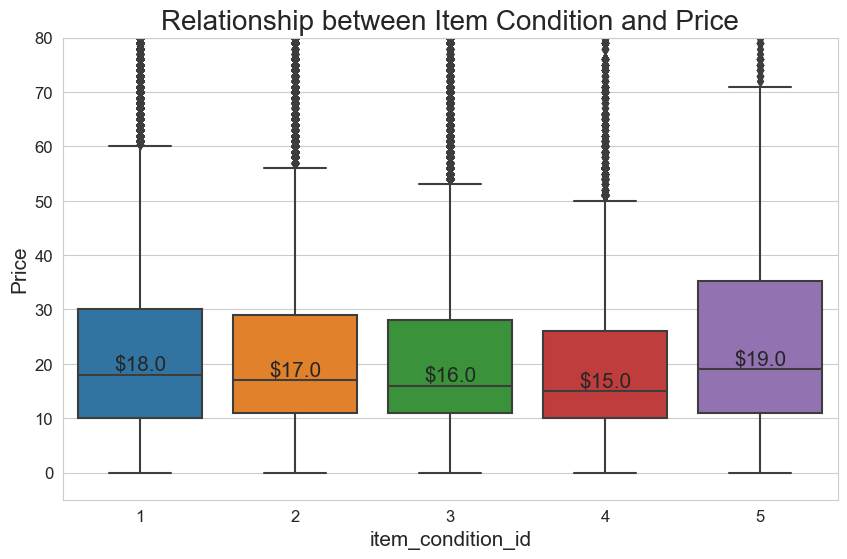

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize = (10,6))
ax3 = sns.boxplot(x = 'item_condition_id',y = 'price',data = df)
ax3.set_ylim((-5,80))
medians = df.groupby('item_condition_id')['price'].median().values
for i in range(len(medians)):
    x_co = i
    y_co = medians[i]
    text_label = medians[i]
    plt.text(x_co,y_co,'$'+str(text_label),ha = 'center',va = 'bottom',size = 15)
plt.xlabel('item_condition_id',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Relationship between Item Condition and Price',fontsize = 20)

As the item condition gets worse, the median price gets lower, from  18 to 15 Dollars. But the group of condition number 5 seems don't follow this trend as it bouncing back drastically with a median of 19 Dollars, even higher than the median of group 1. There maybe one explanation, that is, the size of the group 5 is far smaller than the other four groups. Thus, this situation is happened by chance.

In [34]:
condition_five = df[df['item_condition_id']==5]
condition_five_top_ten = (condition_five['category_name'].value_counts()/condition_five.shape[0])[:10]
print(condition_five_top_ten)

Electronics/Cell Phones & Accessories/Cell Phones & Smartphones    0.221057
Electronics/Video Games & Consoles/Consoles                        0.072148
Electronics/Video Games & Consoles/Games                           0.060822
Men/Shoes/Athletic                                                 0.039010
Electronics/Computers & Tablets/Laptops & Netbooks                 0.032718
Kids/Toys/Dolls & Accessories                                      0.023909
Women/Women's Handbags/Shoulder Bag                                0.023490
Electronics/Computers & Tablets/iPad/Tablet/eBook Readers          0.020554
Electronics/Video Games & Consoles/Accessories                     0.015520
Women/Shoes/Sandals                                                0.014681
Name: category_name, dtype: float64


In [35]:
df[df['category_name']=='Electronics/Cell Phones & Accessories/Cell Phones & Smartphones']

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
22,Galaxy S7 Edge (Unlocked) 32GB,3,Electronics/Cell Phones & Accessories/Cell Pho...,Samsung,386.0,0,"Reasonable offers welcomed. But if you ask ""lo..."
149,LIKE NEW IPHONE 5C,2,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,104.0,0,Just Upgraded So Now Finally Getting Rid Of My...
320,Professional Precision Digital Scale,1,Electronics/Cell Phones & Accessories/Cell Pho...,NaN,12.0,0,RT-500 Professional Digital Mini Scale Precisi...
796,iPhone 4,3,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,30.0,1,Black iPhone 4 for Verizon comes with charger
1022,Galaxy note 5 64 gb (read description),4,Electronics/Cell Phones & Accessories/Cell Pho...,Samsung,115.0,1,Color : black Description : 64 gb galaxy note ...
...,...,...,...,...,...,...,...
1481811,IPhone 6,5,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,40.0,0,Activation lock cracked comes with case no cha...
1481831,T-Mobile Samsung Galaxy S6 GOLD,2,Electronics/Cell Phones & Accessories/Cell Pho...,Samsung,200.0,1,Only a year old and well taken care of. No dam...
1481864,Nexus 5x,2,Electronics/Cell Phones & Accessories/Cell Pho...,LG,80.0,1,Unlocked Comes with box & everything in it Did...
1482052,Pop sockets,1,Electronics/Cell Phones & Accessories/Cell Pho...,PopSockets,7.0,1,No description yet


We see that electronic products are the big part of group 5. Although there are elecronic products in other groups, the huge amount of other items does pull down the median price. Probabily, people are less likely to buy items except electronic when their conditions get heavily used.

### category_name

In [36]:
top_10_categories = df['category_name'].value_counts()[:10]
top10_cat_per = [str(np.round(i*100,2))+'%' for i in (df['category_name'].value_counts()/df.shape[0])[:10]]

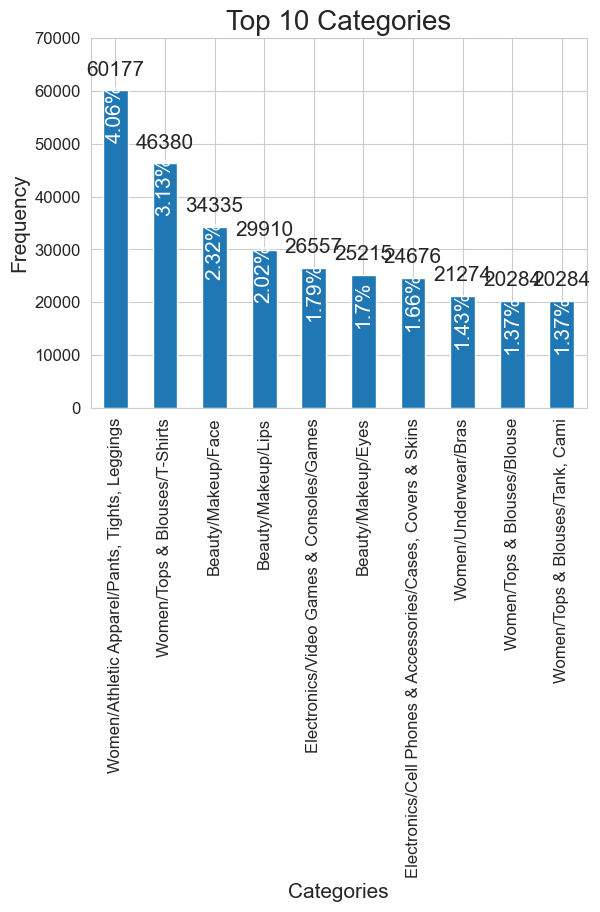

In [37]:
plt.ylim(0,70000)
ax4 = top_10_categories.plot(kind = 'bar')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Categories',fontsize = 15)
plt.ylabel('Frequency',fontsize  =15)
plt.title('Top 10 Categories',fontsize = 20)
for i,bar in enumerate(ax4.patches):
    x_co1 = bar.get_x()+bar.get_width()/2
    y_co1 = bar.get_height()+2000
    x_co2 = bar.get_x()+bar.get_width()/2
    y_co2 = bar.get_height()-10000
    plt.text(x_co1,y_co1,top_10_categories[i],ha = 'center',size = 15,va = 'bottom')
    plt.text(x_co2,y_co2,top10_cat_per[i],ha = 'center',va = 'bottom',color = 'white',size = 15,rotation = 90)
    
plt.show()

This bar chart shows the top ten popular categories on sale in our data set. The most frequent one is women athletic apparel with a percentage of 4.06% among all the items. We also noticed that among all the top ten frequent categories, eight categories are woman related, which is an informative fact.

Besides these we are also curious about what are the ten categories with highest mean price as well as what are the ten categories with lowest mean price.

In [38]:
cat_price_mean = df.groupby('category_name').agg({'price':'mean'})

In [39]:
top10_high = cat_price_mean.sort_values(by = 'price',ascending=False).iloc[:10,:]
top10_low = cat_price_mean.sort_values(by = 'price').iloc[:10,:]

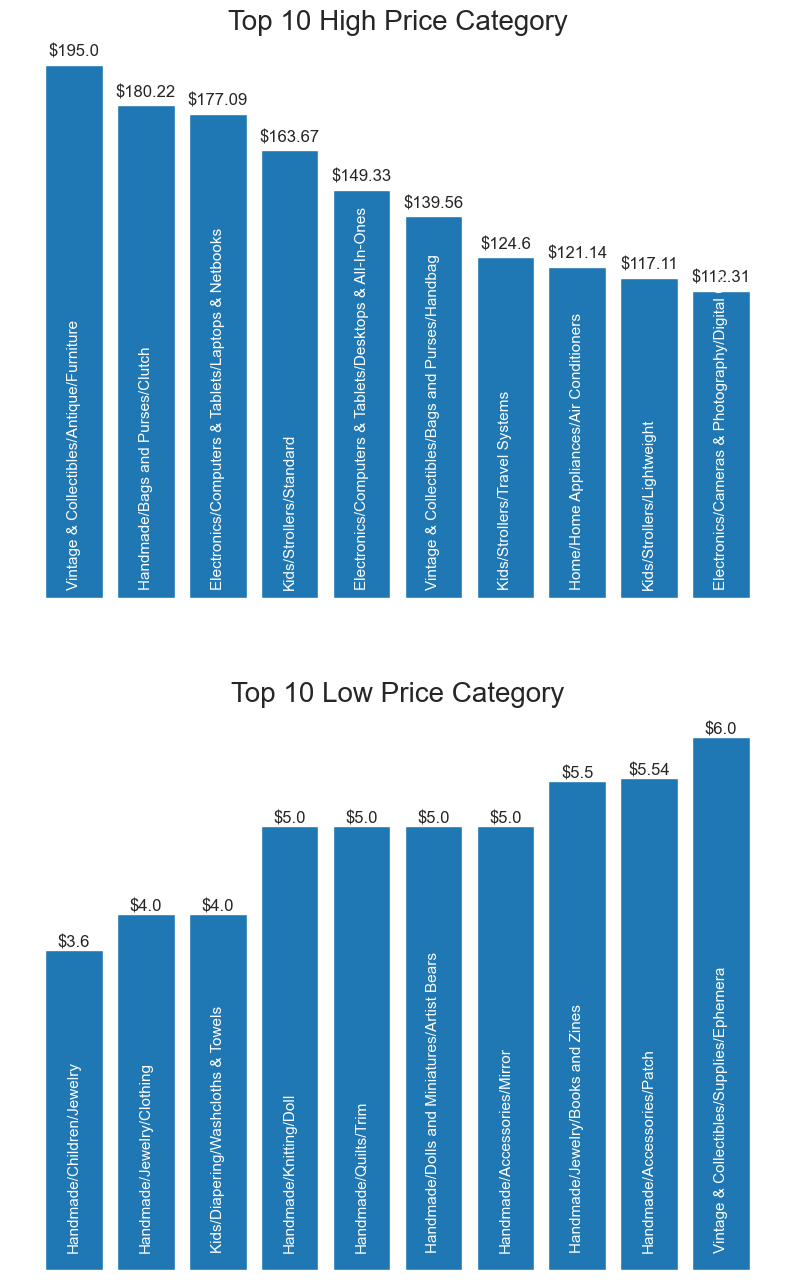

In [40]:
fig,(ax5,ax6) = plt.subplots(nrows = 2,figsize = (10,16))
a1 = ax5.bar(range(len(top10_high)),top10_high['price'])
a2 = ax6.bar(range(len(top10_low)),top10_low['price'])
ax5.set_xticks([])
ax6.set_xticks([])
ax5.set_title('Top 10 High Price Category',fontsize = 20)
ax6.set_title('Top 10 Low Price Category',fontsize = 20)
ax5.axis('off')
ax6.axis('off')
for i in range(len(top10_high)):
    x_co_price_high = a1.patches[i].get_x()+a1.patches[i].get_width()/2
    y_co_price_high = a1.patches[i].get_height()+2
    x_co_price_low = a2.patches[i].get_x()+a2.patches[i].get_width()/2
    y_co_price_low = a2.patches[i].get_height()
    x_co_cat_high = a1.patches[i].get_x()+a1.patches[i].get_width()/2
    y_co_cat_high = 3
    x_co_cat_low = a2.patches[i].get_x()+a2.patches[i].get_width()/2
    y_co_cat_low = 0.2
    ax5.text(x_co_price_high,y_co_price_high,'$'+str(np.round(top10_high['price'][i],2)),ha = 'center',va = 'bottom',size = 12)
    ax5.text(x_co_cat_high,y_co_cat_high,top10_high.index[i],ha = 'center',va = 'bottom',rotation = 90,size = 11,color = 'white')
    ax6.text(x_co_price_low,y_co_price_low,'$'+str(np.round(top10_low['price'][i],2)),ha = 'center',va = 'bottom',size = 12)
    ax6.text(x_co_cat_low,y_co_cat_low,top10_low.index[i],ha = 'center',va = 'bottom',rotation = 90,size = 11,color = 'white')

Now we got top ten high price categories and top ten low price categories. In the upper side, we can see Handmade bags, vintage and collectibles, home and electronic appliances, and kids stroller items with prices higher than 100 Dollars. In the lower side, most things are handmade craft with price around 5 Dollars.

### brand_name
For the brand_name, we also curious about which brands are the top frequent ones in our data set. Of course we have already identified that more than 40 percent of items have missing values in brand name, we will not take those null values into account when answer this question.

#### What is the Top 10 Brands Sold ? 

In [41]:
top10_brand = df['brand_name'].value_counts()[:10]
top10_brand_per = [str(np.round(i*100,2))+'%' for i in (df['brand_name'].value_counts()/df.shape[0])[:10]]

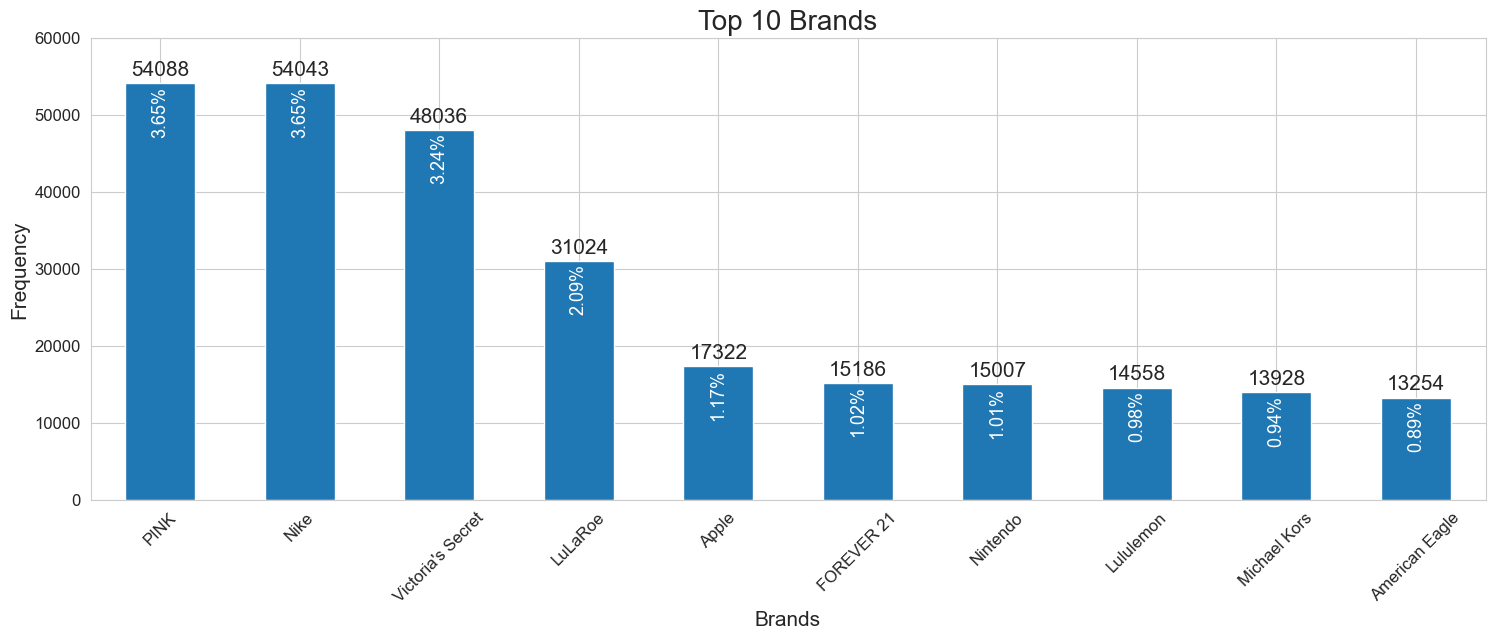

In [42]:
plt.figure(figsize = (18,6))
ax7 = top10_brand.plot(kind = 'bar')
plt.ylim(0,60000)
plt.xticks(size = 12,rotation = 45)
plt.yticks(size = 12)
plt.xlabel('Brands',fontsize = 15)
plt.ylabel('Frequency',fontsize  =15)
plt.title('Top 10 Brands',fontsize = 20)
for i,bar in enumerate(ax7.patches):
    x_co1 = bar.get_x()+bar.get_width()/2
    y_co1 = bar.get_height()+500
    x_co2 = bar.get_x()+bar.get_width()/2
    y_co2 = bar.get_height()-7000
    plt.text(x_co1,y_co1,top10_brand[i],ha = 'center',size = 15,va = 'bottom')
    plt.text(x_co2,y_co2,top10_brand_per[i],ha = 'center',va = 'bottom',color = 'white',size = 13,rotation = 90)
    
plt.show()

Here, the first place brand PINK is a branch of Victoria's Secret, which ranked at third place in this plot. We could tell that the Victoria's Secret is really a popular brand among online consumers there. By scanning over the top 10 frequent brands, we found large proportion of them are apparel brands, especially female apparel brands. Then follows athelitic brands like Nike, Adidas and Under Armour, and eletronic device brands like Apple, Nintendo and Sony. This result is in accordance with the top frequent categories we discovered previously.

Similar to category_name, we are trying to tell what are the top ten high price brands as well as what are the top ten low price brands.

In [43]:
brand_price_mean = df.groupby('brand_name').agg({'price':'mean'})

In [44]:
top10_high = brand_price_mean.sort_values(by = 'price',ascending=False).iloc[:10,:]
top10_low = brand_price_mean.sort_values(by = 'price').iloc[:10,:]

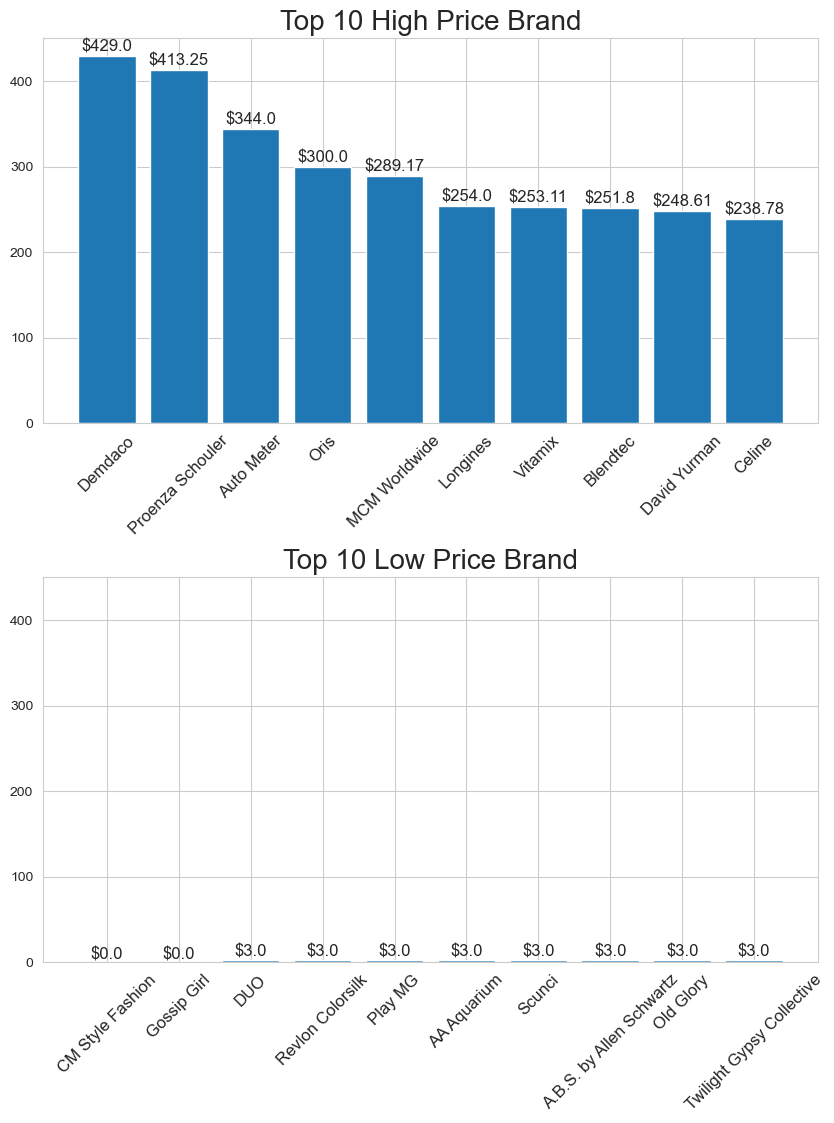

In [45]:
fig,(ax8,ax9) = plt.subplots(nrows = 2,figsize = (10,12),sharey = True)
a1 = ax8.bar(range(len(top10_high)),top10_high['price'])
a2 = ax9.bar(range(len(top10_low)),top10_low['price'])
ax8.set_xticks(range(len(top10_high)))
ax8.set_xticklabels(top10_high.index,rotation = 45,fontsize = 12)
ax9.set_xticks(range(len(top10_low)))
ax9.set_xticklabels(top10_low.index,rotation = 45,fontsize = 12)
ax8.set_title('Top 10 High Price Brand',fontsize = 20)
ax9.set_title('Top 10 Low Price Brand',fontsize = 20)
for i in range(len(top10_high)):
    x_co_price_high = a1.patches[i].get_x()+a1.patches[i].get_width()/2
    y_co_price_high = a1.patches[i].get_height()+2
    x_co_price_low = a2.patches[i].get_x()+a2.patches[i].get_width()/2
    y_co_price_low = a2.patches[i].get_height()
    ax8.text(x_co_price_high,y_co_price_high,'$'+str(np.round(top10_high['price'][i],2)),ha = 'center',va = 'bottom',size = 12)
    ax9.text(x_co_price_low,y_co_price_low,'$'+str(np.round(top10_low['price'][i],2)),ha = 'center',va = 'bottom',size = 12)
plt.subplots_adjust(hspace = 0.4)
plt.show()

By checking all the brands either in upper side or lower side, we realized that these brands are all not commonly seen brands. Among the top 10 high price brands, we could see various of category those brand belong to, we found bag brands, blender brands, handmade craft brands, jewelry brands, and watch brands. By googleing the brands in the lower side, we found that some brands are even absent from the searching results. What is more wield is that the top 2 brands are selling things for free. Let's dive into this issue and check.

In [46]:
df[(df['brand_name']=='CM Style Fashion') | (df['brand_name']=='Gossip Girl')]

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
747867,BNWT! Gossip Girl Swim Suit! Free Ship!,1,Women/Swimwear/Two-Piece,Gossip Girl,0.0,1,BNWT! Top is a size small and bottoms are a si...
1363442,rain jacket,2,Women/Coats & Jackets/Raincoat,CM Style Fashion,0.0,0,No description yet


The top 2 low price brands have only 1 records for each of them. We think these kind of records could be considered as noises. We might consider eliminate them when training models.

As we discovered, more than 40 percent of items in our data set is lack of brand name.Here, we are going to check whether there is a gap on price between these items and those ones with brand names.

In [47]:
null_brand = df[['category_name','price']]
null_brand['null_brand'] = (df['brand_name'].isnull())*1

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\3938851177.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Influence of missing brand name on price')

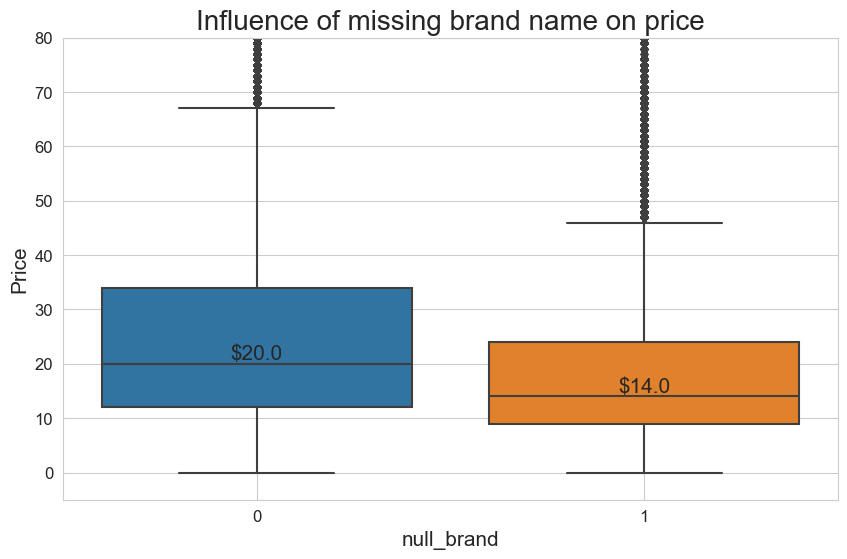

In [48]:
#sns.set_style("whitegrid")
plt.figure(figsize = (10,6))
ax10 = sns.boxplot(x = 'null_brand',y = 'price',data = null_brand)
plt.grid('off')
ax10.set_ylim(-5,80)
medians = null_brand.groupby('null_brand')['price'].median().values
for i in range(len(medians)):
    x_co = i
    y_co = medians[i]
    text_label = medians[i]
    plt.text(x_co,y_co,'$'+str(text_label),ha = 'center',va = 'bottom',size = 15)
plt.xlabel('null_brand',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Influence of missing brand name on price',fontsize = 20)

We found that the median price for items without a brand name is only 14 Dollars, which is far lower than the 20 Dollars of items with a brand name. Both groups contain huge amounts of records, so the possibility that this outcome is by chance is very small. One plausible explannation is that items miss their brand names are made by unwellknown companies so that they have to be sold cheaper than products with wellknown manufacturers.

### shipping 
1 is shipping fee paid by seller and 0 by buyer.

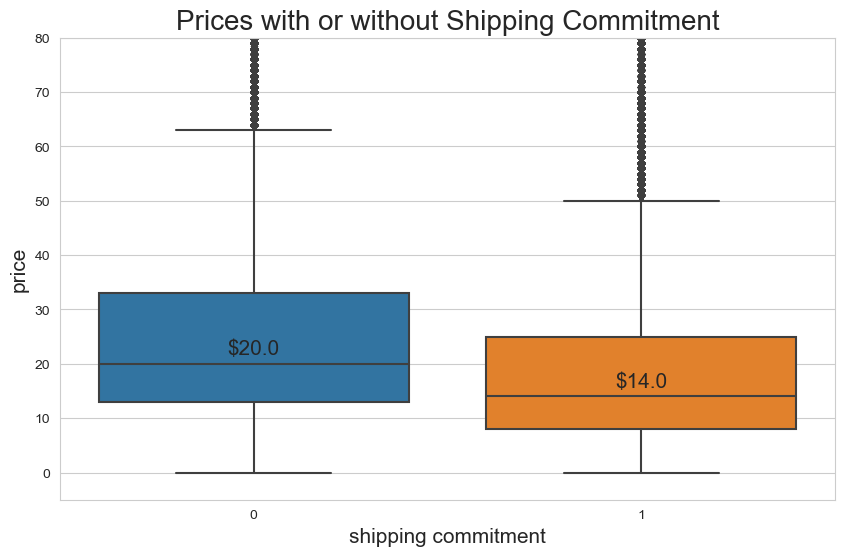

In [49]:
medians = df.groupby('shipping')['price'].median().values
plt.figure(figsize = (10,6))
a3 = sns.boxplot(x = 'shipping', y = 'price', data = df)
a3.set_ylim(-5,80)
for i in range(len(medians)):
    x_co = i
    y_co = medians[i]+1
    s = '$'+str(medians[i])
    a3.text(x_co,y_co,s,ha = 'center',va = 'bottom',size = 15)
a3.set_ylabel('price',fontsize = 15)
a3.set_xlabel('shipping commitment',fontsize = 15)
a3.set_title('Prices with or without Shipping Commitment',fontsize = 20)
plt.show()

 This result is contrary to what we expected.We thought that sellers who made shipping commitment might charge higher prices on items then those who didn't. The fact is a reverse. The sellers commited to pay shipping fee charge 6 Dollars lower than those who didn't.

#### Shipping fee is paid almost by seller or buyer ? 

In [50]:
print(df["shipping"].value_counts()[0]/len(df["shipping"])*100) #By Buyer
print(df["shipping"].value_counts()[1]/len(df["shipping"])*100) #By Seller

55.272556803043436
44.727443196956564


In [51]:
df_shipping = df['shipping'].value_counts().to_frame().rename(columns={'shipping': 'Count'})
df_shipping.reset_index(inplace=True)
df_shipping= df_shipping.rename(columns = {'index':'shipping'})
df_shipping

,shipping,Count
0,0,819435
1,1,663100


<Axes: ylabel='Count'>

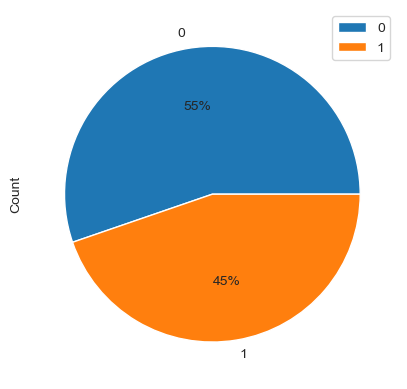

In [52]:
# if shipping fee is paid  : 1 : by seller , 0 : by buyer
df_shipping.groupby(['shipping']).sum().plot(kind='pie', y='Count', autopct='%1.0f%%')

We can see from pie chart that 55% of products shipping fee is paid by the buyer and 45% by the seller.

### item_description
In previous investigations, we found that lots of duplicates are exist in item_descriptions. So, first we are going to identify these duplicates by looking at the top frequent records in item_description.

In [53]:
top_description = df['item_description'].value_counts()[:10]
top_description_per = (df['item_description'].value_counts()/df.shape[0])[:10]

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\2960108842.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator



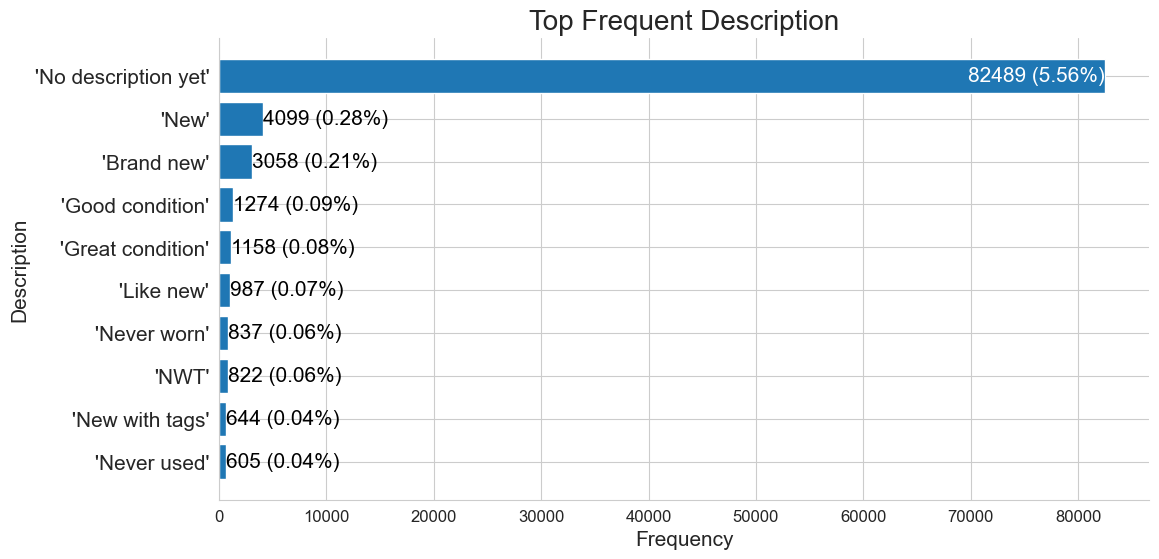

In [54]:
plt.figure(figsize = (12,6))
a4 = plt.barh(range(len(top_description)),top_description)
plt.gca().invert_yaxis()
plt.grid('off')
ax13 = plt.gca()
ax13.set_yticks(range(len(top_description)))
ax13.set_yticklabels(["'"+str(i)+"'" for i in top_description.index],fontsize = 15)
for i in range(len(top_description)):
    if top_description[i]>30000:
        ha = 'right'
        color = 'white'
    else:
        ha = 'left'
        color = 'black'
    x_co = ax13.patches[i].get_width()
    y_co = ax13.patches[i].get_y()+ax13.patches[i].get_height()/2
    s = str(top_description[i])+' ('+str(np.round(top_description_per[i]*100,2))+'%)'
    ax13.text(x_co,y_co,s,va = 'center',ha = ha,color = color,size = 15)
ax13.spines['top'].set_visible(False)
ax13.spines['right'].set_visible(False)
ax13.set_xlabel('Frequency',fontsize = 15)
ax13.set_ylabel('Description',fontsize = 15)
ax13.set_title('Top Frequent Description',fontsize = 20)
ax13.set_xticklabels(ax13.get_xticks().astype(int),fontsize = 12)
plt.show()

From the result, we could tell that the most frequent item description is 'No description yet'. This string does not seem like something added by sellers. So, we are going to regard them as missing values. Other top frequent descriptions are very short descriptions like 'New', 'Brand new', and 'Good Condition'.

Is there any difference in price between 'No description yet' items and other items?

In [55]:
no_description = df[['price']]
no_description['no_description'] = (df['item_description']=='No description yet')*1
medians = no_description.groupby('no_description')['price'].median().values

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\1948828983.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



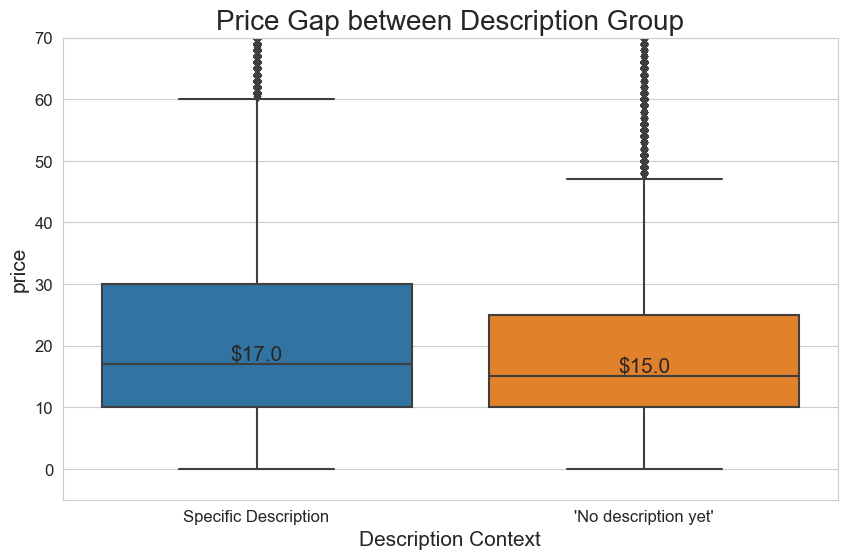

In [56]:
plt.figure(figsize = (10,6))
a14 = sns.boxplot(x = 'no_description',y = 'price',data = no_description)
a14.set_xticklabels(['Specific Description', "'No description yet'"],fontsize  =12)
plt.yticks(fontsize = 12)
plt.ylim(-5,70)
plt.ylabel('price',fontsize = 15)
plt.xlabel('Description Context',fontsize = 15)
plt.title('Price Gap between Description Group',fontsize = 20)
for i in range(len(medians)):
    x_co = i
    y_co = medians[i]
    a14.text(x_co,y_co,'$'+str(medians[i]),ha = 'center',va = 'bottom',size = 15)
plt.show()

It seems that items with a 'No description yet' description would have a slightly lower price than those who got specific descriptions.

# Cleaning 

### Missing Values

In [57]:
df.isnull().sum(axis=0) #Number of Nulls in each column

name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

- The column with the most null values is **brand_name** : **632682**
- Then, **6327** records have null values in **category_name** column.
- Only **4** items miss their **item_description**

In [58]:
def mode_func(x):
    return x.mode().iloc[0] if not x.mode().empty else None
# grouped the data by (category_name) then we got the brand_name mode of each group
brand_name_grouped = df.groupby('category_name')['brand_name']
grouped = brand_name_grouped.agg(mode_func).reset_index()

# Display the result
print(grouped)

                                     category_name         brand_name
0                          Beauty/Bath & Body/Bath  Bath & Body Works
1           Beauty/Bath & Body/Bathing Accessories  Victoria's Secret
2                     Beauty/Bath & Body/Cleansers  Bath & Body Works
3                         Beauty/Bath & Body/Other  Bath & Body Works
4      Beauty/Bath & Body/Scrubs & Body Treatments  Bath & Body Works
...                                            ...                ...
1282  Women/Women's Handbags/Messenger & Crossbody       Michael Kors
1283                  Women/Women's Handbags/Other              Coach
1284                Women/Women's Handbags/Satchel       Michael Kors
1285           Women/Women's Handbags/Shoulder Bag              Coach
1286       Women/Women's Handbags/Totes & Shoppers  Victoria's Secret

[1287 rows x 2 columns]


In [59]:
#fill the missing value in each group with the brand_name mode of its group 
modes = brand_name_grouped.transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(modes)
# Fill missing values in 'brand_name' with the calculated modes within each group
df['brand_name'] = df['brand_name'].fillna(modes)

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\4252080452.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\4252080452.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\4252080452.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\4252080452.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\4252080452.py:2: FutureWarning:

The def

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\4252080452.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\4252080452.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\4252080452.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\4252080452.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\4252080452.py:2: FutureWarning:

The def

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\4252080452.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\4252080452.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\4252080452.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\4252080452.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Msys\AppData\Local\Temp\ipykernel_8724\4252080452.py:2: FutureWarning:

The def

0                  Nike
1                 Apple
2            FOREVER 21
3              Rae Dunn
4          Kendra Scott
               ...     
1482530         LuLaRoe
1482531          Disney
1482532          Fitbit
1482533        Rae Dunn
1482534    Michael Kors
Name: brand_name, Length: 1482535, dtype: object


In [60]:
modes.isnull().any()

True

In [61]:
# NaN Values means unknown brands :
df["brand_name"].fillna("No Brand", inplace=True)# fill the remaining missing values with "No Brand"
# drop rows with null values:
df.dropna(inplace=True)

In [67]:
df.isnull().sum()

name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64

### Remove Items with 0 Price

In [70]:
df = df[df.price != 0] # drop records with price 0

In [71]:
df.shape

(1475343, 7)

## Feature Engineering

In [72]:
def category_tranformation(category):
    try:
        category, sub_category_1, sub_category_2 = category.split('/')
        return category, sub_category_1, sub_category_2
    except:
        return 'Other', 'Other', 'Other'

In [73]:
df['main_category'], df['category_sub1'], df['category_sub2'] = zip(*df['category_name'].apply(category_tranformation))
train_category = df[['main_category','category_sub1','category_sub2','price']]
train_category.head()

,main_category,category_sub1,category_sub2,price
0,Men,Tops,T-shirts,10.0
1,Electronics,Computers & Tablets,Components & Parts,52.0
2,Women,Tops & Blouses,Blouse,10.0
3,Home,Home Décor,Home Décor Accents,35.0
4,Women,Jewelry,Necklaces,44.0


In [74]:
print("Number of unique Main Categories = %d." % df['main_category'].nunique())
print("Number of unique Sub-Categories-1 = %d." % df['category_sub1'].nunique())
print("Number of unique Sub-Categories-2 = %d." % df['category_sub2'].nunique())

Number of unique Main Categories = 10.
Number of unique Sub-Categories-1 = 113.
Number of unique Sub-Categories-2 = 864.


### Top 10 of Main Categories

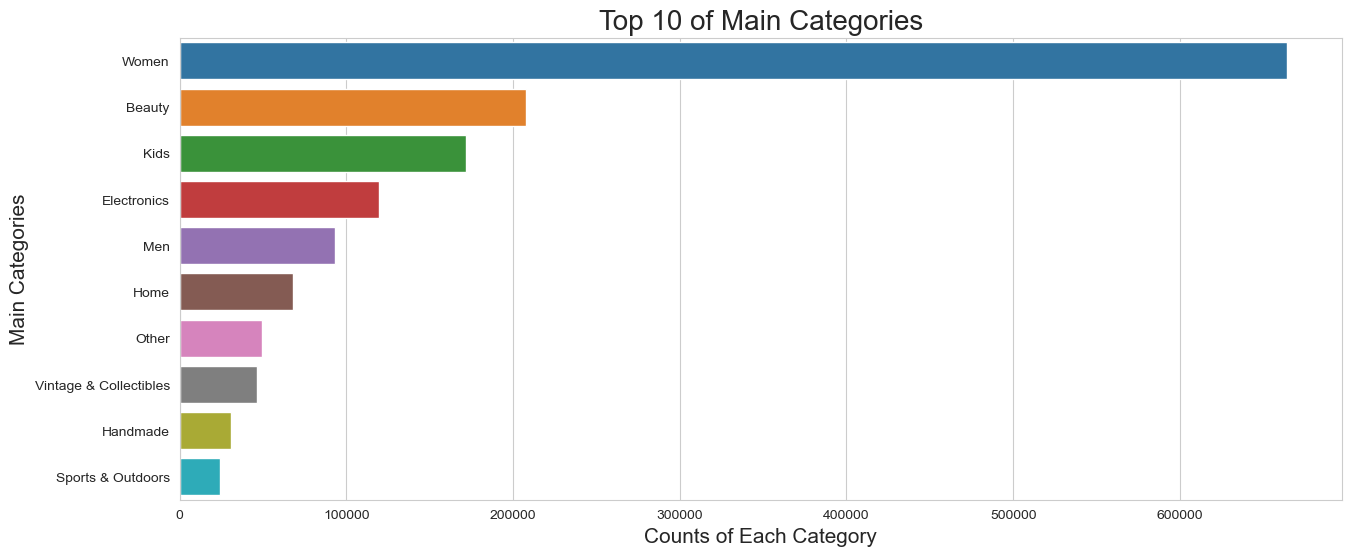

In [75]:
plt.figure(figsize=(15,6))
sns.countplot(y=df['main_category'],order=df['main_category'].value_counts().index)
plt.title('Top 10 of Main Categories', fontsize=20)
plt.xlabel('Counts of Each Category', fontsize=15)
plt.ylabel('Main Categories', fontsize=15)
plt.show()

### Mean Price of Top 10 Main Categories

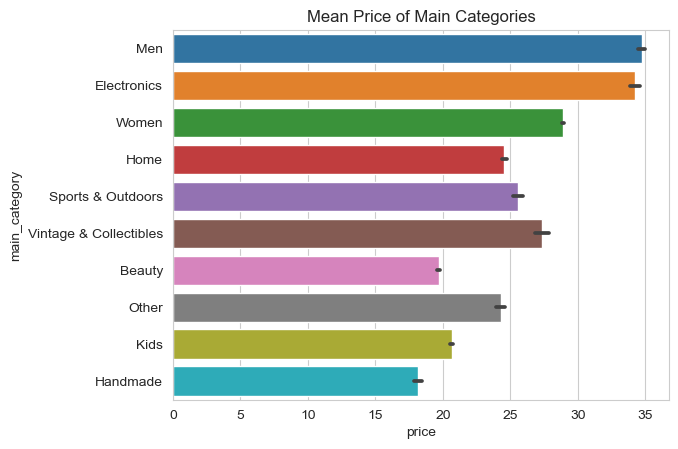

In [76]:
sns.barplot(y='main_category', x='price', data=df)
plt.title('Mean Price of Main Categories')
plt.show()

In [77]:
train_category['main_category'].nunique()

10

In [78]:
#Ratio of main Categories
df['main_category'].value_counts()/len(df)

Women                     0.450057
Beauty                    0.140797
Kids                      0.116281
Electronics               0.081050
Men                       0.063234
Home                      0.045976
Other                     0.033697
Vintage & Collectibles    0.031531
Handmade                  0.020899
Sports & Outdoors         0.016478
Name: main_category, dtype: float64

Women takes up about 45% of the main categoies.

### Top 10 Sub-Categories-1

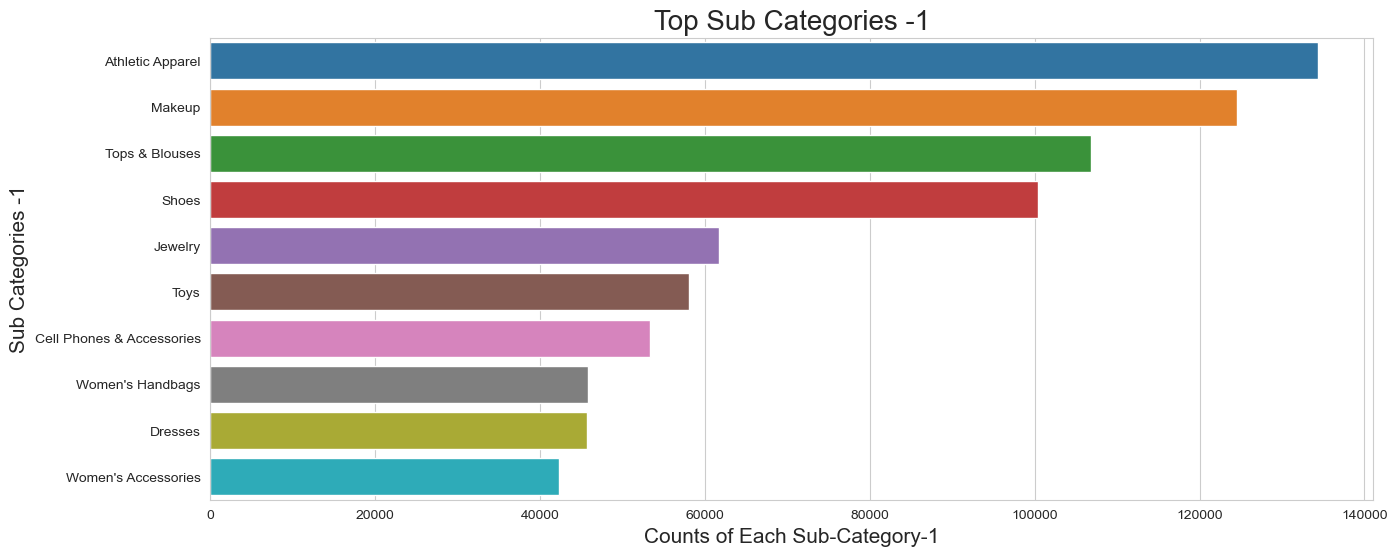

In [79]:
plt.figure(figsize=(15,6))
sns.countplot(y=df['category_sub1'],order=df['category_sub1'].value_counts()[:10].index)
plt.title('Top Sub Categories -1', fontsize=20)
plt.xlabel('Counts of Each Sub-Category-1', fontsize=15)
plt.ylabel('Sub Categories -1', fontsize=15)
plt.show()